In [ ]:
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

datasetUnfiltered = pd.read_csv("filtered_transfers.csv")
dataset=datasetUnfiltered[datasetUnfiltered["fee"].str.startswith("€")]

len(set(datasetUnfiltered["club_involved_name"]))

1535

In [ ]:
unique_feeValues = len(datasetUnfiltered["fee"].unique())
num_unique_non_euro_fees = len(datasetUnfiltered[~datasetUnfiltered["fee"].str.startswith("€")]["fee"].unique())
print(f"Valores de fees :{unique_feeValues}")
print(f"Valores de fees sem ser venda :{num_unique_non_euro_fees}")
print(f"Valores de fees em vendas :{unique_feeValues - num_unique_non_euro_fees}")

Valores de fees :668
Valores de fees sem ser venda :300
Valores de fees em vendas :368


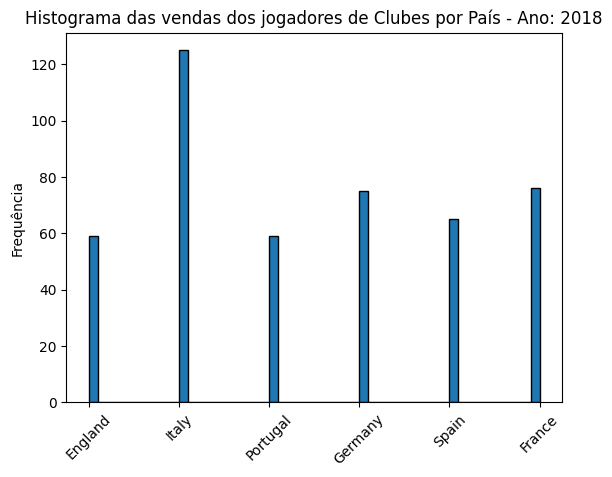

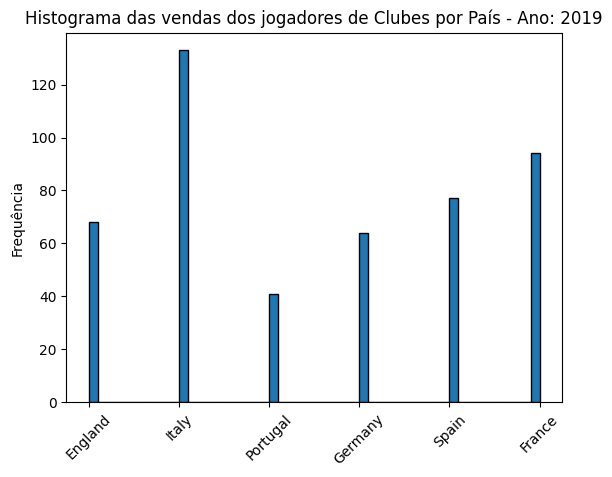

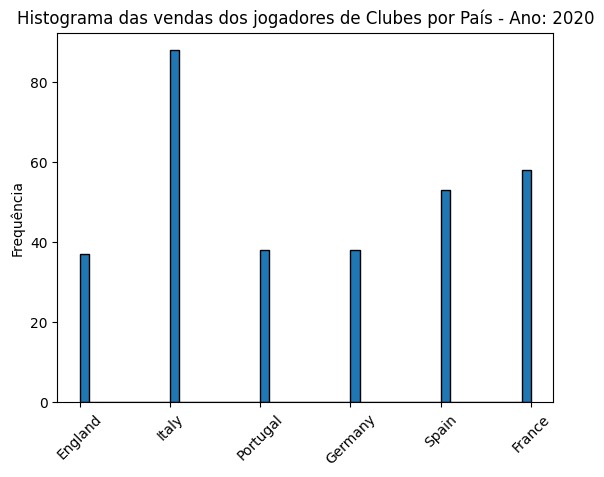

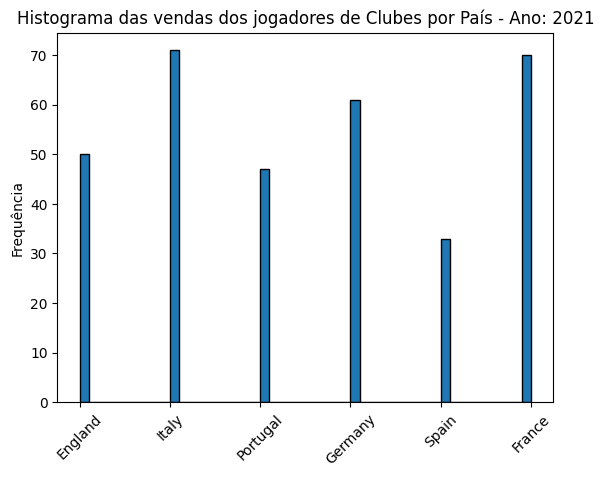

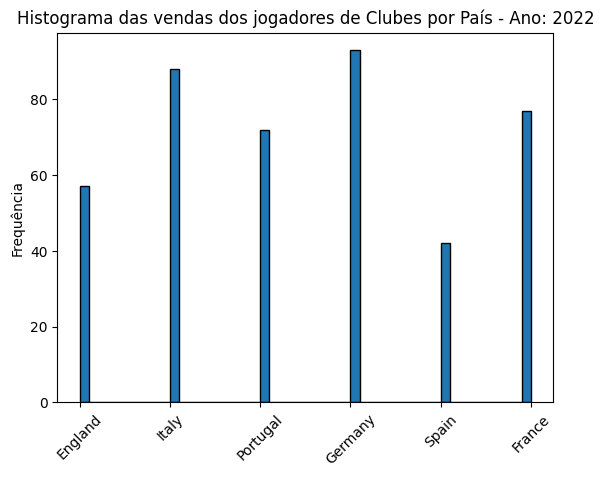

In [ ]:

unique_years = dataset["year"].unique()
dataset=dataset[dataset["fee"].str.startswith("€")]
dataset["fee_cleaned"] = pd.to_numeric(dataset["fee_cleaned"], errors="coerce")
for year in unique_years:
    year_data = dataset[dataset["year"]==year]
    plt.hist(year_data["country"], bins=50, edgecolor='black')
    plt.title(f"Histograma das vendas dos jogadores de Clubes por País - Ano: {year}")
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)
    plt.show()




# w= sorted(set(dataset["club_name"].unique()))
# d= sorted(set(dataset[dataset['club_involved_name'].isin(w)]["club_involved_name"]))
# print(f"{w}\n{d}")
#  x= set(dataset["club_name"])
 #y= set(dataset[dataset['club_involved_name'].isin(x)]["club_involved_name"])
# print(f"{x}\n{y}")

   

In [ ]:
TopClubSet = dataset.groupby(["club_name", "country"])["fee_cleaned"].sum()
TopClubSet = pd.DataFrame(TopClubSet)
TopClubSet = TopClubSet.sort_values(by="fee_cleaned", ascending=False)
TopClubSet = TopClubSet.reset_index()
TopClubs =[]

In [ ]:
for country in TopClubSet["country"].unique():
     TopClubs += TopClubSet[TopClubSet["country"]==country].nlargest(TopN,"fee_cleaned")["club_name"].to_list()



In [ ]:
dataset = dataset[dataset["club_name"].isin(TopClubs) & dataset["club_involved_name"].isin(TopClubs) ]
# dataset = dataset[dataset["club_name"].isin(TopClubs)  ]

dataset['fee_cleaned'] = dataset['fee_cleaned'].astype(float)


# Create edges as tuples with weight as an attribute
edges = [(row['club_name'], row['club_involved_name'], row['fee_cleaned']) for _, row in dataset.iterrows()]



{'Manchester City': 12, 'Olympique Lyon': 10, 'VfB Stuttgart': 2, 'Liverpool FC': 5, 'Leicester City': 4, 'Chelsea FC': 8, 'Real Madrid': 10, 'AS Monaco': 12, 'Juventus FC': 9, 'Aston Villa': 2, 'Everton FC': 5, 'Tottenham Hotspur': 2, 'Atlético de Madrid': 6, 'Manchester United': 3, 'Inter Milan': 6, 'Wolverhampton Wanderers': 4, 'Paris Saint-Germain': 9, 'RB Leipzig': 8, 'Atalanta BC': 5, 'OGC Nice': 3, 'Bayern Munich': 6, 'SL Benfica': 7, 'AS Roma': 8, 'Bayer 04 Leverkusen': 6, 'AC Milan': 5, 'Sevilla FC': 9, 'FC Barcelona': 13, 'Brighton & Hove Albion': 3, 'SSC Napoli': 6, 'FC Porto': 8, 'Sporting CP': 7, 'ACF Fiorentina': 4, 'Genoa CFC': 5, 'Valencia CF': 6, 'Udinese Calcio': 4, 'US Sassuolo': 4, 'Hertha BSC': 4, 'Borussia Dortmund': 8, 'LOSC Lille': 12, 'Portimonense SC': 3, 'SC Braga': 4, 'Vitória Guimarães SC': 4, 'Rio Ave FC': 5, 'CD Santa Clara': 2, 'Stade Rennais FC': 9, 'Boavista FC': 1, 'FC Famalicão': 2, 'Celta de Vigo': 5, 'TSG 1899 Hoffenheim': 6, 'Eintracht Frankfurt':

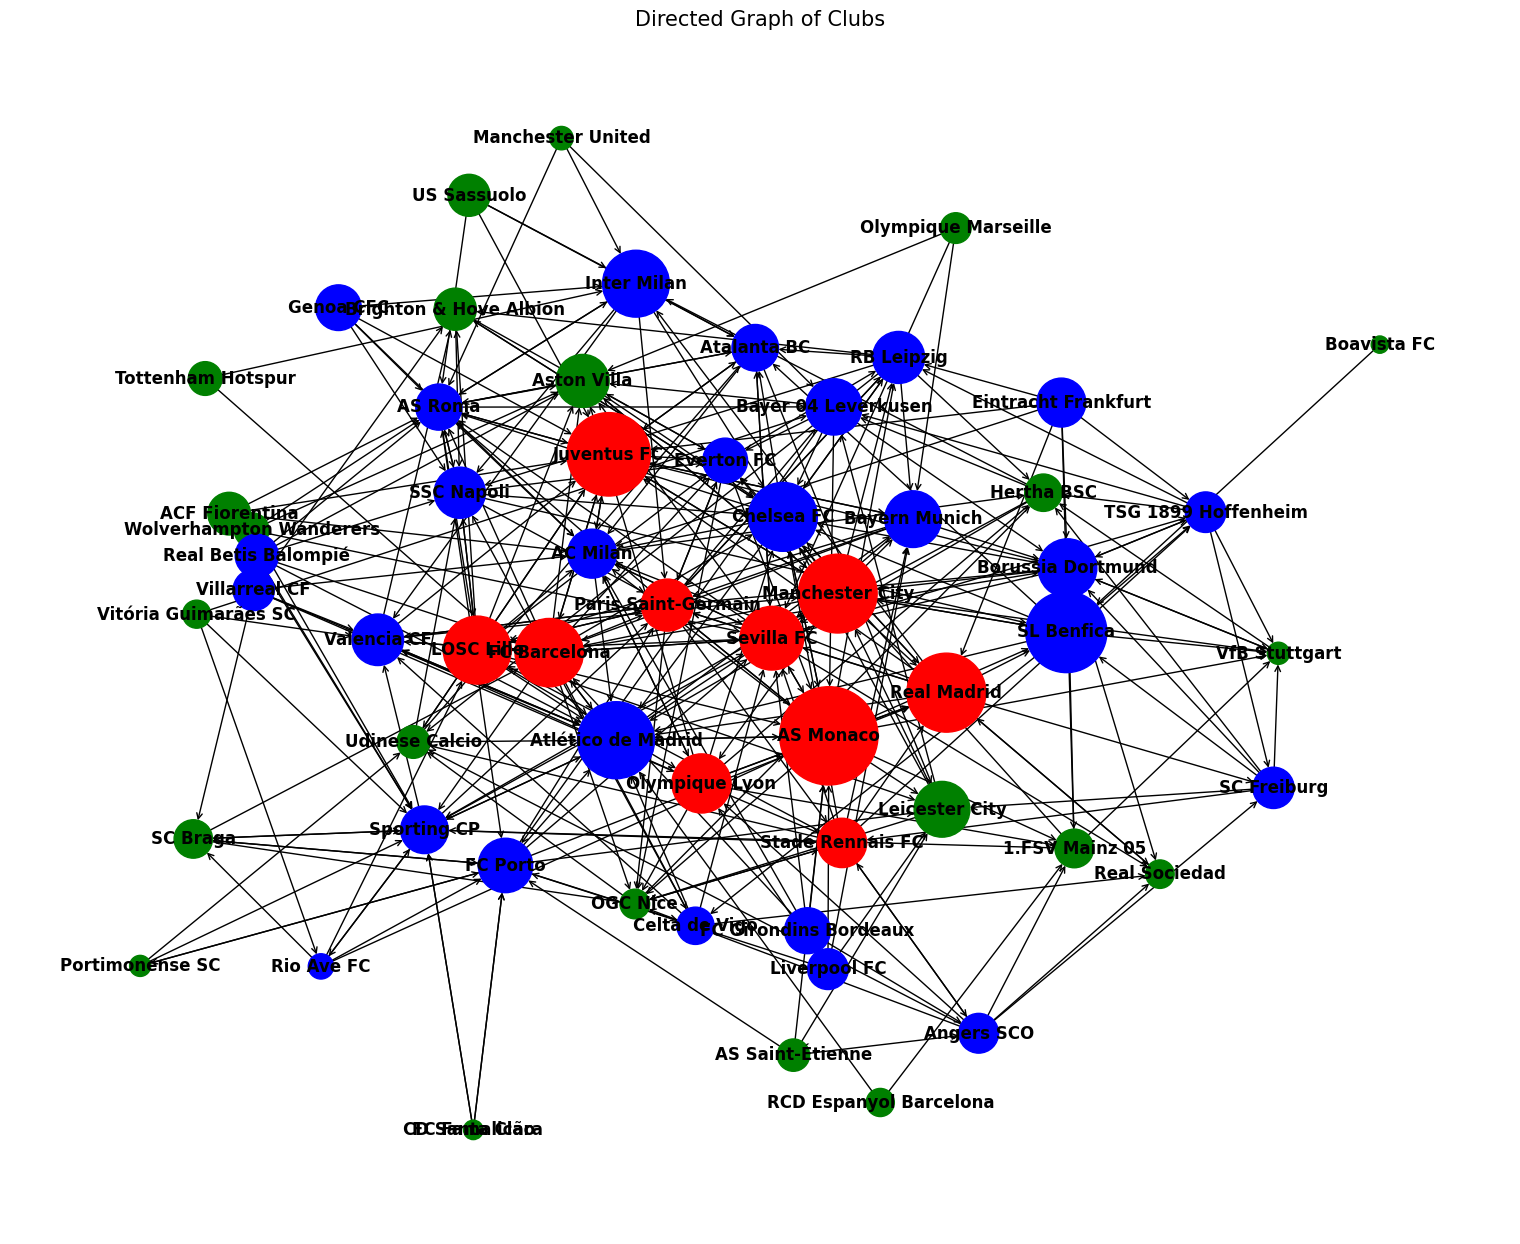

Is the network strongly connected? 
R:False


In [ ]:

# Create directed graph
G = nx.DiGraph()
G.add_weighted_edges_from(edges)
node_weights = {node: 0 for node in G.nodes()}
#Agregar  valor de vendas por clubes
for u, v, data in G.edges(data=True):
    node_weights[u] += data['weight']  

countries = TopClubSet["country"].unique()
colors = ["red", "blue", "green"]

degrees = dict(G.out_degree())


print(degrees)
max_degree = max(degrees.values())
low_threshold = max_degree / 3
high_threshold = 2 * max_degree / 3


# Assign nodes to groups based on their degree
for node, degree in degrees.items():
    if degree <= low_threshold:
        G.nodes[node]['color'] = "green"  # Low degree
    elif degree <= high_threshold:
        G.nodes[node]['color'] =  "blue" # Medium degree
    else:
        G.nodes[node]['color'] = "red" # High degree


node_colors = [attrs['color'] for _, attrs in G.nodes(data=True)]
    
node_sizes = [100+(node_weights[node] * 10 ) for node in G.nodes()] 
plt.figure(figsize=(15, 12))
layout = nx.kamada_kawai_layout(G, weight='fee_cleaned')  
nx.draw(G, layout, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=12, font_weight='bold', arrowstyle='->', arrowsize=10)
plt.title('Directed Graph of Clubs', fontsize=15)
plt.show()
print(f"Is the network strongly connected? \nR:{nx.is_strongly_connected(G)}")
if nx.is_strongly_connected(G): 
    print(f"Network diameter? \nR:{nx.diameter(G)}")



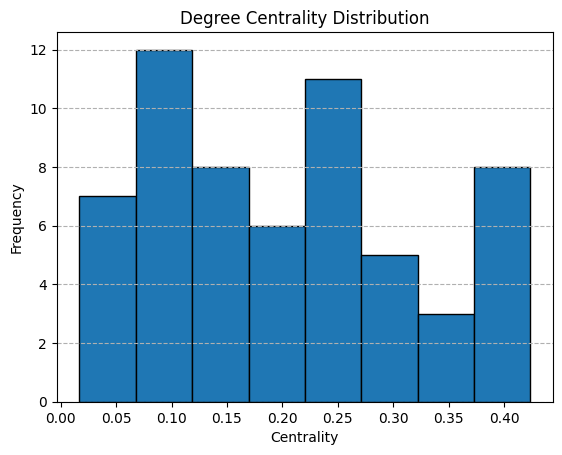

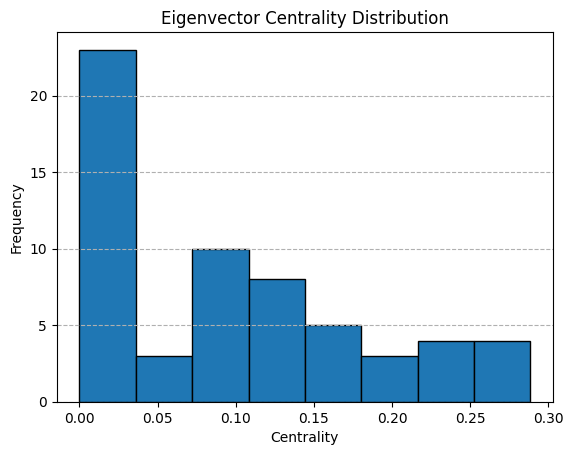

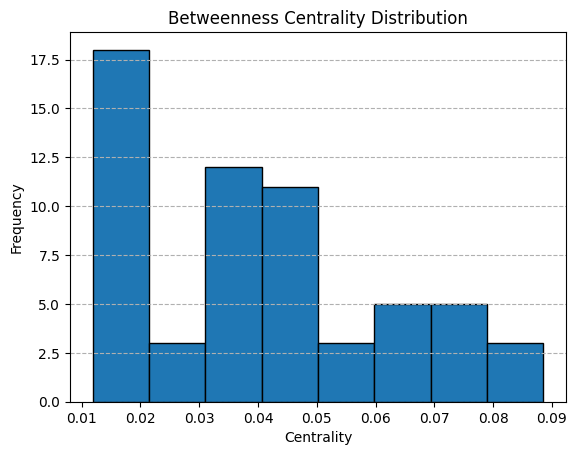

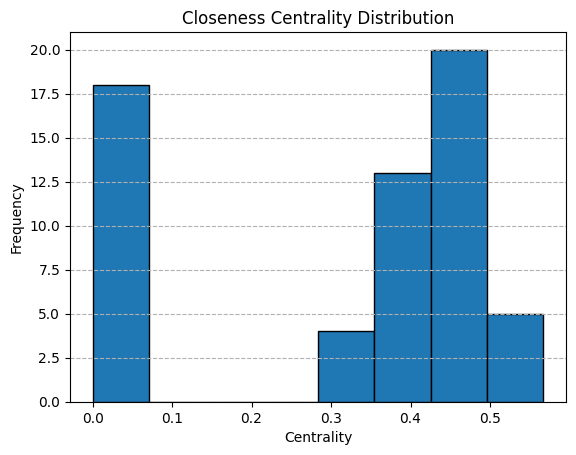

In [ ]:
# Calculate the centralities
import operator


degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=True)
closeness_centrality = nx.closeness_centrality(G)

# Function to plot the centrality distributions
def plot_centrality_distribution(centrality_dict, title):
    plt.figure()
    plt.hist(list(centrality_dict.values()), bins=8, edgecolor='black')
    plt.xlabel('Centrality')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', linestyle='--')
    plt.show()

# Plot each centrality distribution
plot_centrality_distribution(degree_centrality, "Degree Centrality Distribution")
plot_centrality_distribution(eigenvector_centrality, "Eigenvector Centrality Distribution")
plot_centrality_distribution(betweenness_centrality, "Betweenness Centrality Distribution")
plot_centrality_distribution(closeness_centrality, "Closeness Centrality Distribution")

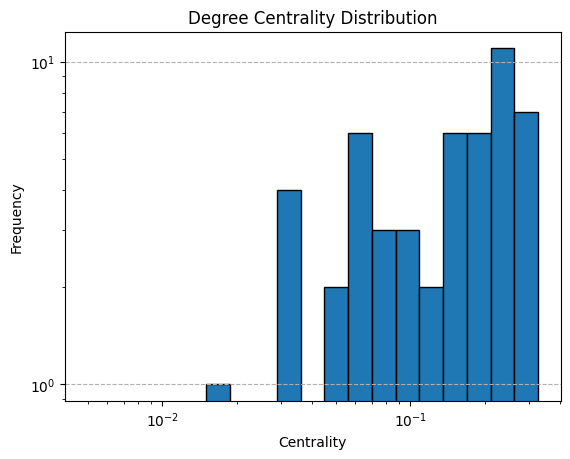

In [ ]:
# Function to plot the centrality distributions
def plot_centrality_distribution(centrality_dict, title):
    data = list(centrality_dict.values()) 
    plt.figure()
    start, stop = np.log10(min(data)), np.log10(max(data))
    bins = 20 ** np.linspace(start, stop, 20)
    plt.hist(data, log=True, bins=bins, edgecolor='black')
    plt.xscale('log')
    plt.xlabel('Centrality')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', linestyle='--')
    plt.show()

# Plot each centrality distribution
plot_centrality_distribution(degree_centrality, "Degree Centrality Distribution")